# Import libraries


In [286]:
!pip install scikit-learn-extra


In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


# Load the dataset


In [391]:
data = pd.read_csv('CC GENERAL.csv')

In [379]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [380]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Exploratory Data Analysis


### Data Processing


### Data Cleaning


In [397]:
data = data.drop('CUST_ID', axis=1)  # Drop the 'CUST_ID' column and reassign to data


In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [399]:
data.duplicated().sum()
data.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [400]:
data['MINIMUM_PAYMENTS'].isna().value_counts(normalize=True)

,proportion
MINIMUM_PAYMENTS,
False,0.965028
True,0.034972


In [401]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-401-548e7322d2c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)


In [402]:
data['CREDIT_LIMIT'].isna().value_counts()

,count
CREDIT_LIMIT,
False,8950


In [403]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

<ipython-input-403-679039f2ed94>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)


In [404]:
data.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


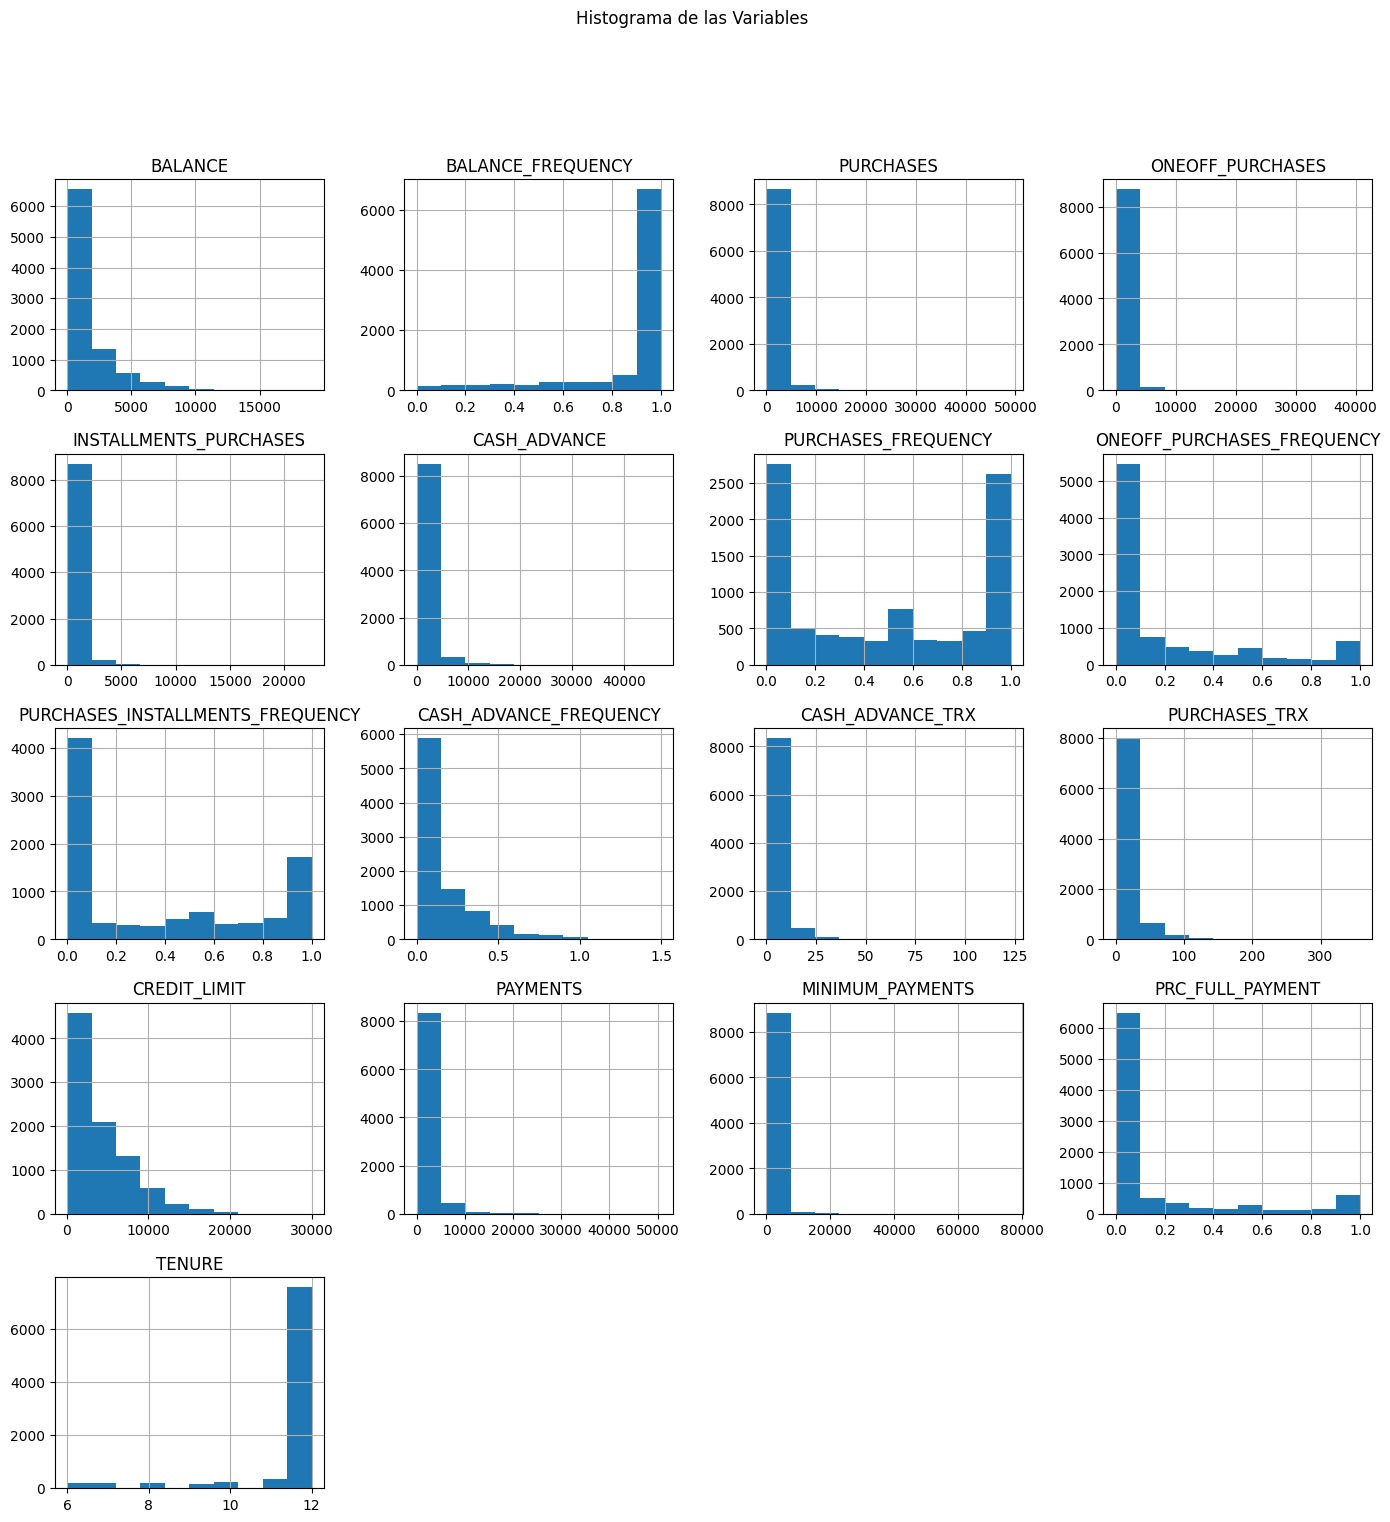

In [405]:
#Hacer un histograma
data.hist(bins=10, figsize=(17, 17))
plt.suptitle('Histograma de las Variables')
plt.show()


In [406]:
mediana = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(mediana, inplace=True)

<ipython-input-406-621b24bfbf5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(mediana, inplace=True)


0

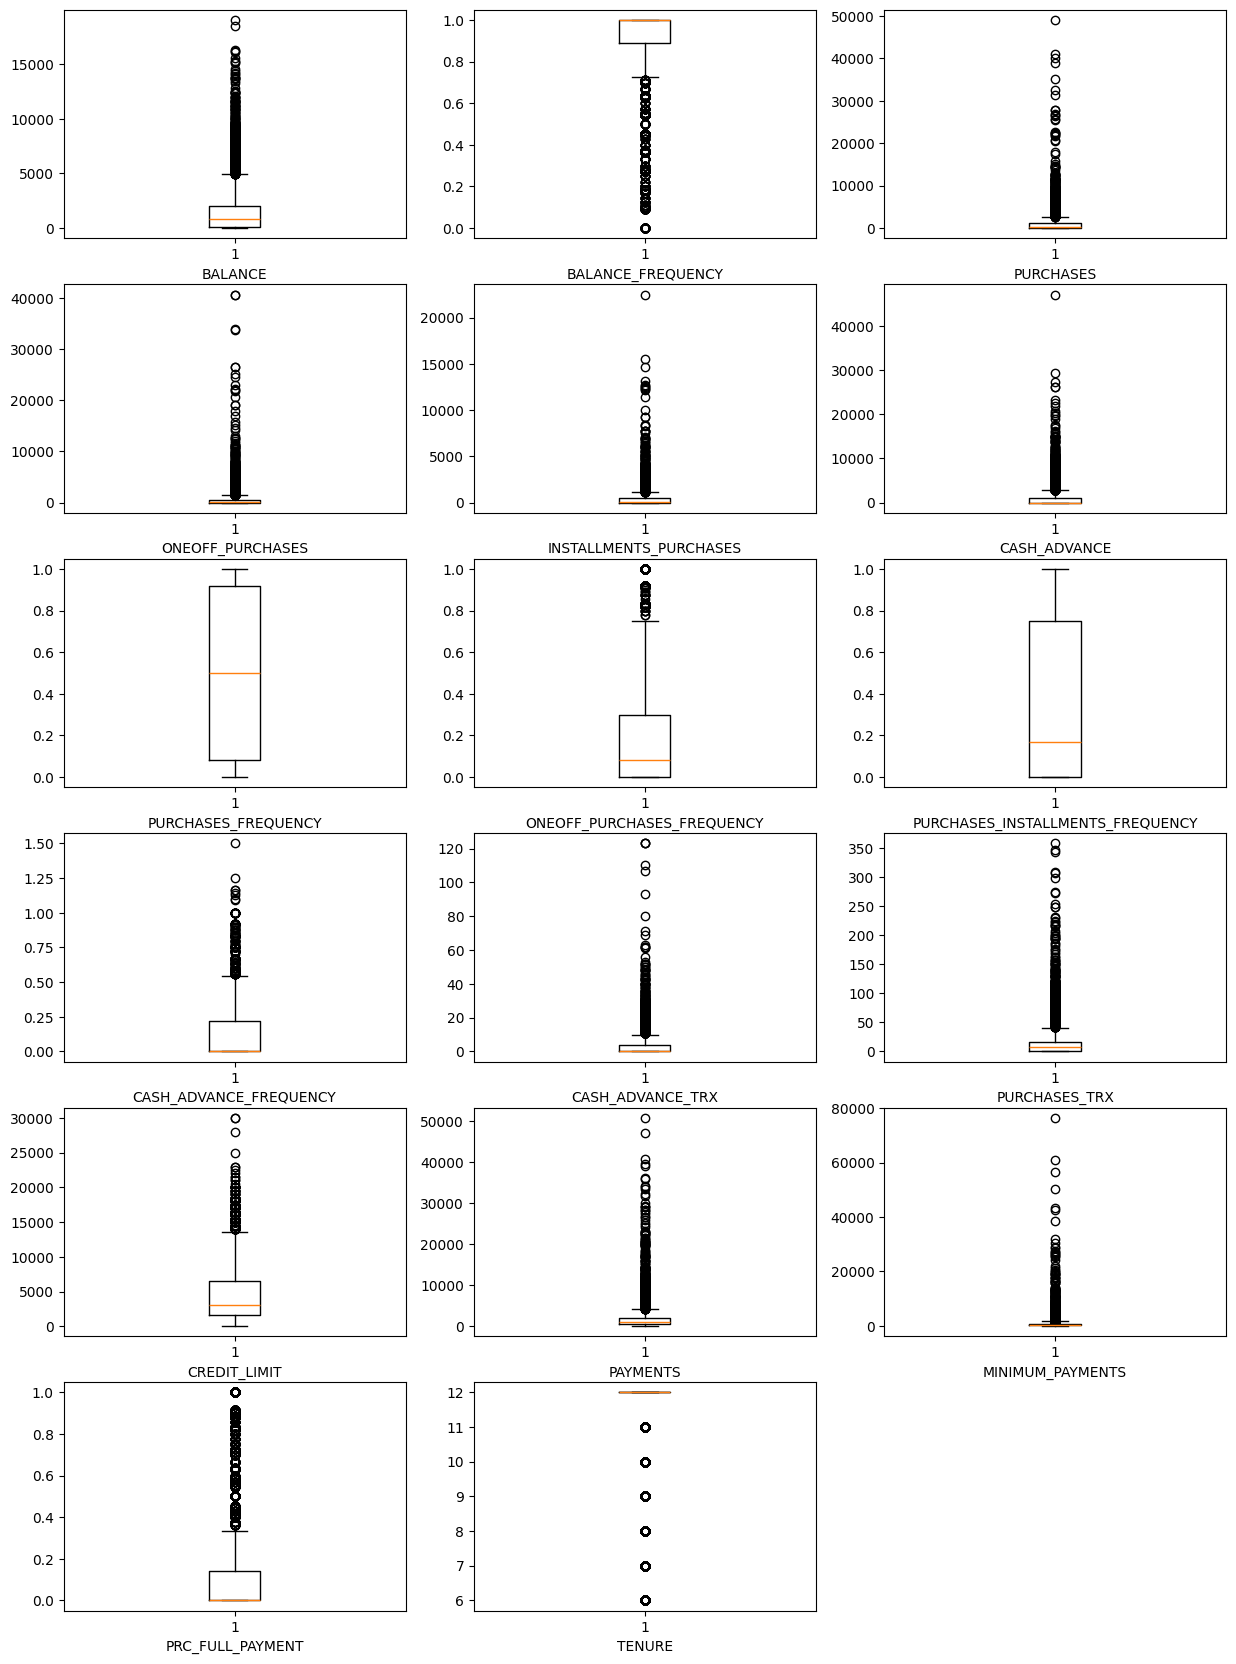

In [407]:
# Checking for outliers
%matplotlib inline
plt.figure(figsize= (15,60))

for i in range(0,17):
    plt.subplot(17, 3, i+1)
    plt.xlabel(data.columns[i])
    plt.boxplot(data[data.columns[i]])

#plt.show

data.duplicated().sum()

<Axes: >

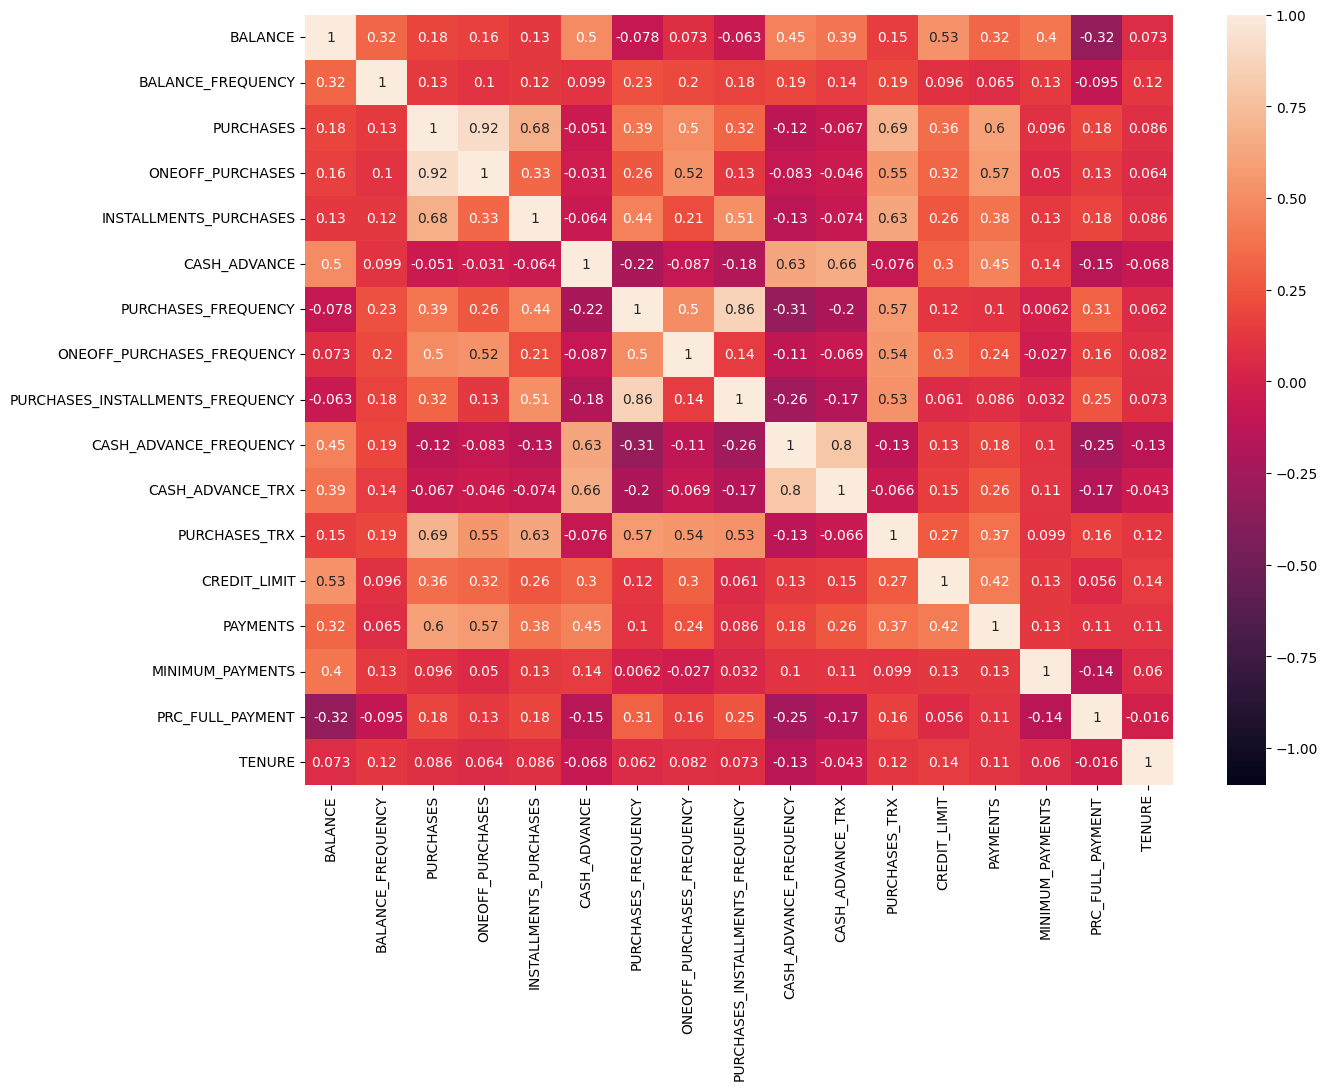

In [408]:
correlation_matrix = data.corr()
correlation_matrix
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix,vmin=1, vmax=-1, annot= True)

## Feature Engineering
Cree al menos 2 variables nuevas


In [410]:
#Frecuencia Combinada de Compras y Adelantos en Efectivo
data['PURCHASE_ADVANCE_COMBINED'] = data['PURCHASES_FREQUENCY'] + data['CASH_ADVANCE_FREQUENCY']
#% Uso del credito en compras
data['CREDIT_LIMIT_COMPRA_RATIO'] = data['PURCHASES'] / data['CREDIT_LIMIT']

# PAYMENT_RATIO (Proporción de Pagos Realizados)
data['PAYMENT_RATIO'] = data['PAYMENTS'] / data['BALANCE']
data['PAYMENT_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['PAYMENT_RATIO'] = data['PAYMENT_RATIO'].fillna(0)
# CASH_ADVANCE_RATIO (Proporción de Adelantos de Efectivo sobre el Saldo)
data['CASH_ADVANCE_RATIO'] = data['CASH_ADVANCE'] / data['BALANCE']
data['CASH_ADVANCE_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data['CASH_ADVANCE_RATIO'] = data['CASH_ADVANCE_RATIO'].fillna(0)

<ipython-input-410-053034f3812c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PAYMENT_RATIO'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-410-053034f3812c>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['PAYMENT_RATIO'] = data['PAYMENT_RATIO'].fillna(0)
<ipython-i

<Axes: >

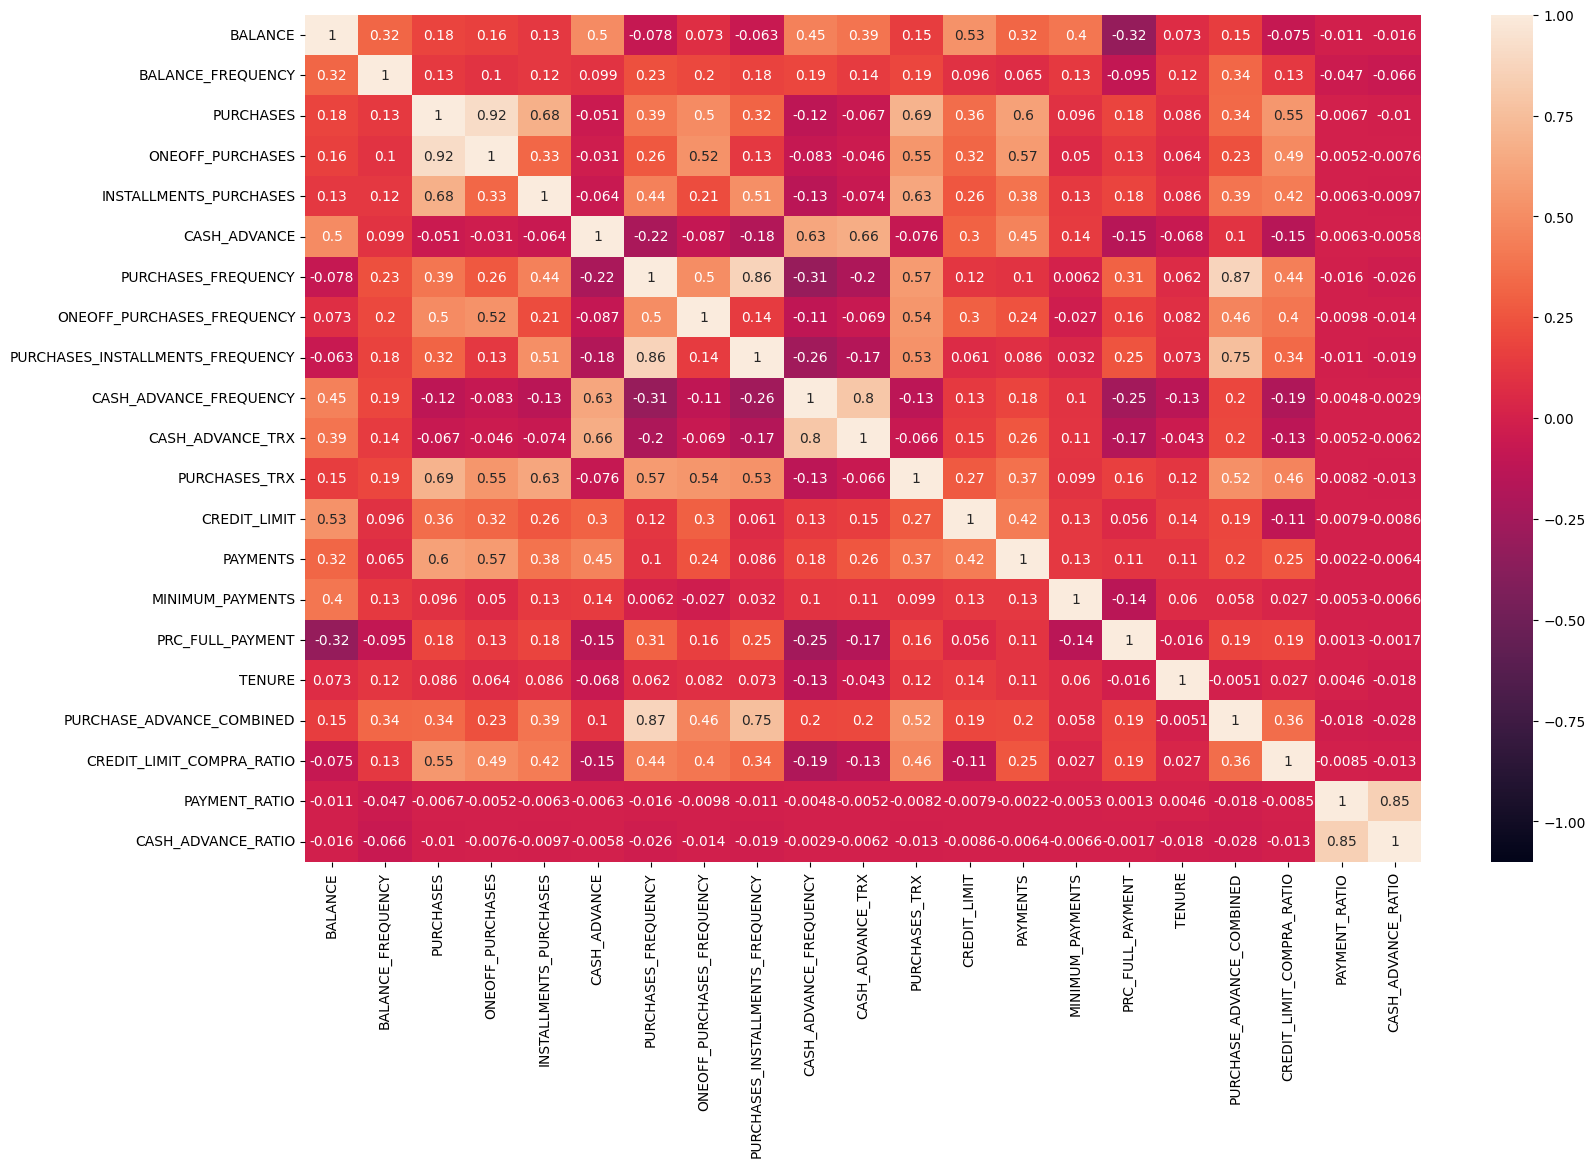

In [417]:
# Diagrama de correlacion con nuevos features.
correlation_matrix = data.corr()
correlation_matrix
plt.figure(figsize=(18,11))
sns.heatmap(correlation_matrix,vmin=1, vmax=-1, annot= True)

## Scaling (if needed)


In [418]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASE_ADVANCE_COMBINED', 'CREDIT_LIMIT_COMPRA_RATIO',
       'PAYMENT_RATIO', 'CASH_ADVANCE_RATIO'],
      dtype='object')

In [419]:
selected_columns = data.columns
da_selected = data[selected_columns]

In [486]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_scaled = data.copy()  # Crear una copia para mantener el DataFrame original

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Visualizar los datos escalados
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PURCHASE_ADVANCE_COMBINED,CREDIT_LIMIT_COMPRA_RATIO,PAYMENT_RATIO,CASH_ADVANCE_RATIO,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Agglomerative_Cluster
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,1.0,0.043479,0.011104,4.160565e-06,0.000000,0,0.0,1.0,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,...,0.222222,1.0,0.086957,0.000000,1.080384e-06,0.000024,0,0.0,0.5,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.0,0.478261,0.011999,2.102318e-07,0.000000,0,0.0,0.5,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,...,0.000000,1.0,0.043478,0.023264,0.000000e+00,0.000001,0,0.0,1.0,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,1.0,0.000000,0.001552,6.995203e-07,0.000000,0,0.2,1.0,1.0


In [420]:
# scaler = RobustScaler()
# data_scaled = scaler.fit_transform(data)
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [421]:
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASE_ADVANCE_COMBINED,CREDIT_LIMIT_COMPRA_RATIO,PAYMENT_RATIO,CASH_ADVANCE_RATIO
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,...,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,0.0,-0.555555,-0.066851,0.499938,0.000000
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,...,-0.4375,0.816327,2.138626,1.230054,1.555556,0.0,-0.444444,-0.359034,-0.011029,2.616570
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,...,0.3125,0.918367,-0.154715,0.509732,0.000000,0.0,0.555556,-0.043301,-0.155377,0.000000
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,...,-0.3750,0.918367,-0.564547,0.000000,0.000000,0.0,-0.555556,0.253100,-0.190252,0.160584
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,...,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,0.0,-0.666667,-0.318198,-0.074210,0.000000


## Train model/Tune hyperparameters


In [487]:
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Usa el DataFrame escalado en lugar de data_scaling
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

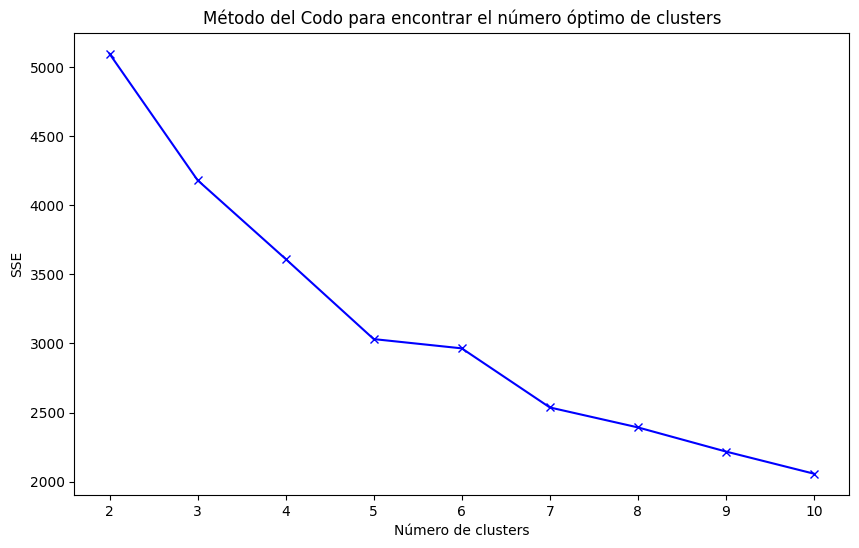

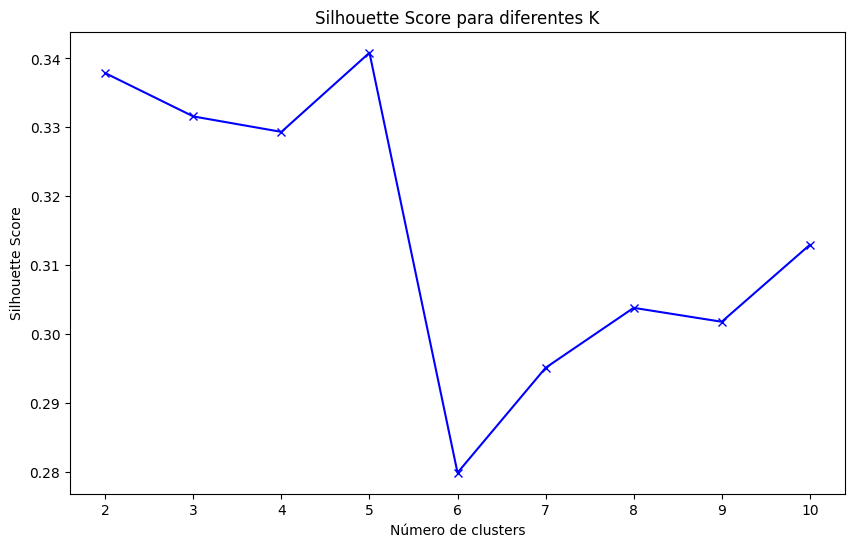

In [488]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

In [489]:
# Parámetros para la búsqueda de Grid Search
param_grid = {
    'n_clusters': range(2, 15),  # Número de clusters para probar
    'metric': ['euclidean', 'manhattan']  # Métricas de distancia a considerar
}

# Variables para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for n_clusters in param_grid['n_clusters']:
    for metric in param_grid['metric']:
        # Definir el modelo K-Medoids con los parámetros actuales
        kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, random_state=42)

        # Ajustar el modelo y predecir etiquetas de clusters
        labels = kmedoids.fit_predict(data_scaled)

        # Evaluar el puntaje de silueta solo si hay más de un cluster
        if len(set(labels)) > 1:
            score = silhouette_score(data_scaled, labels)

            # Guardar si el puntaje de silueta es el mejor encontrado
            if score > best_score:
                best_score = score
                best_params = {
                    'n_clusters': n_clusters,
                    'metric': metric
                }

# Imprimir los mejores parámetros y el mejor puntaje de silueta
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

Mejores Parámetros: {'n_clusters': 2, 'metric': 'manhattan'}
Mejor Silhouette Score: 0.3319


In [638]:

# Parámetros de búsqueda
param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5,0.6, 0.7],  # Valores para el radio de DBSCAN
    'min_samples': [3, 10, 11, 12, 13]  # Valores para el mínimo de puntos para formar un cluster
}

# Variables para almacenar el mejor puntaje y los mejores parámetros
best_score = -1
best_params = {}

# Realizar una búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo DBSCAN con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo y predecir etiquetas de cluster
        labels = dbscan.fit_predict(data_scaled)

        # Verificar que haya al menos 2 clusters generados (excluyendo el ruido)
        if len(set(labels)) > 1:  # Excluir casos donde solo haya ruido o un solo cluster
            # Evaluar el modelo con el puntaje de Silhouette
            score = silhouette_score(data_scaled, labels)

            # Almacenar si encontramos un mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el puntaje más alto de Silhouette Score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {'eps': 0.7, 'min_samples': 10}
Mejor Silhouette Score: 0.3733


In [656]:
kmeans = KMeans(random_state=42,n_clusters=2)
kmedoids = KMedoids(random_state=42,n_clusters=2,metric='manhattan')

dbscan = DBSCAN(eps=0.09,min_samples=5)
aglomerative = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='ward')

In [661]:
modelos= [kmeans,kmedoids,dbscan,aglomerative]
for i in modelos:
  i.fit(data_scaled)

In [644]:
# Aplicar KMeans
kmeans_labels = kmeans.fit_predict(data_scaled)

# Aplicar DBSCAN

dbscan_labels = dbscan.fit_predict(data_scaled)

# Aplicar K-Medoids (aproximación a K-Medians)
kmedoids_labels = kmedoids.fit_predict(data_scaled)

# Aplicar Ward (aglomerativo)
aglomerative_labels = aglomerative.fit_predict(data_scaled)


In [645]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
kmedoids_silhouette = silhouette_score(data_scaled, kmedoids_labels)
aglomerative_silhouette = silhouette_score(data_scaled, aglomerative_labels)
print(f"Silhouette Score (K-Means): {kmeans_silhouette}")
print(f"Silhouette Score (K-Medoids): {kmedoids_silhouette}")
print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")
print(f"Silhouette Score (Ward): {aglomerative_silhouette}")

Silhouette Score (K-Means): 0.33786934015384873
Silhouette Score (K-Medoids): 0.3318601111963191
Silhouette Score (DBSCAN): 0.3732877844275753
Silhouette Score (Ward): 0.30213429192406915


In [646]:
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels
data['KMedoids_Cluster'] = kmedoids_labels
data['Agglomerative_Cluster'] = aglomerative_labels

In [647]:
selected_columns =['PURCHASES_FREQUENCY', 'CASH_ADVANCE_RATIO', 'CREDIT_LIMIT','BALANCE', 'PAYMENT_RATIO', 'CREDIT_LIMIT_COMPRA_RATIO']

# Visualization of clusters

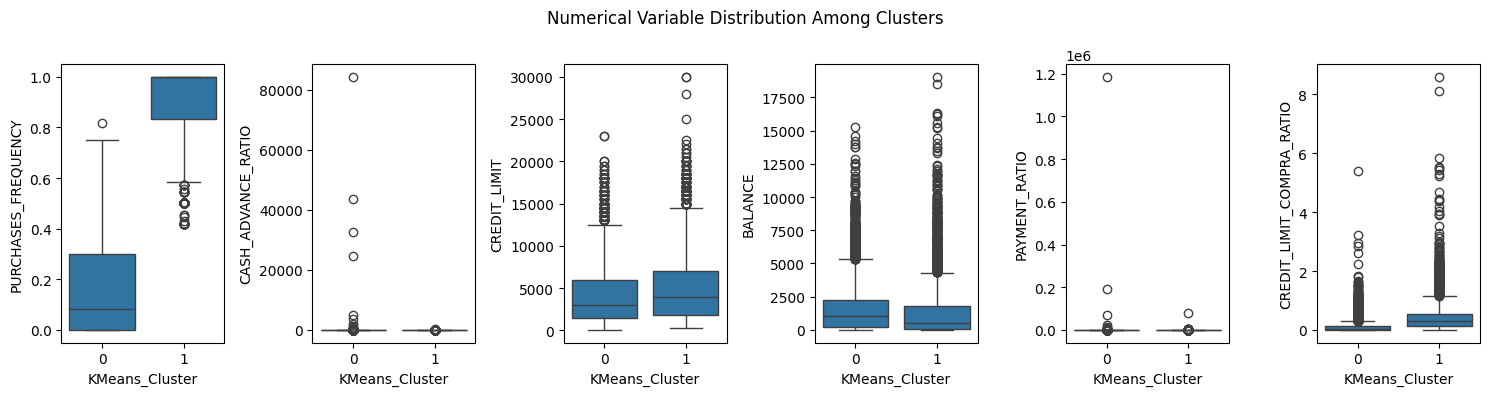

In [649]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 6, figsize=(15, 4))
cols= selected_columns

for i in range(len(cols)):
    sns.boxplot(data=data, x='KMeans_Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

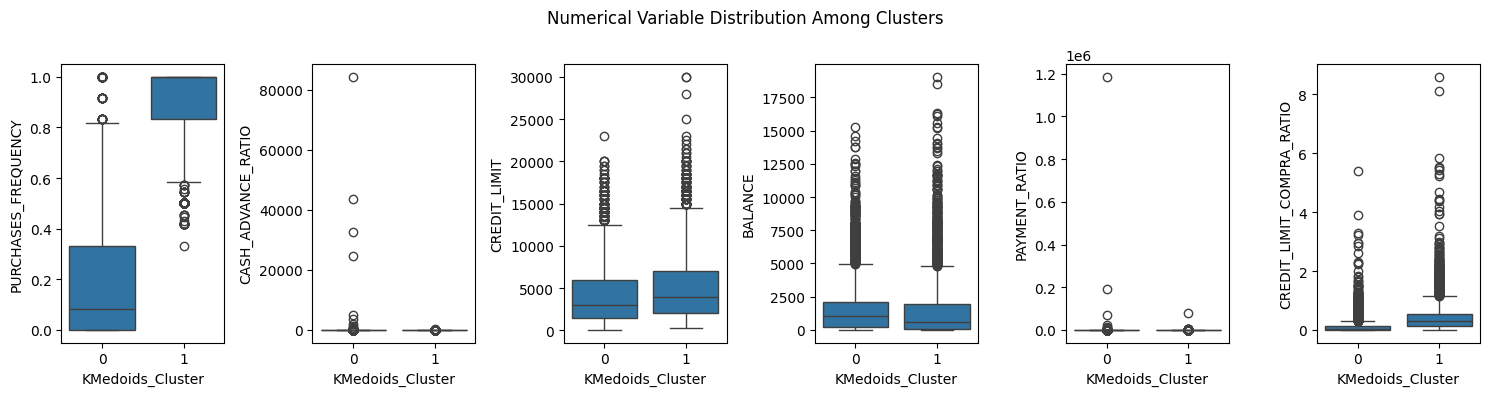

In [650]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 6, figsize=(15, 4))
cols = selected_columns
for i in range(len(cols)):
   sns.boxplot(data=data, x='KMedoids_Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

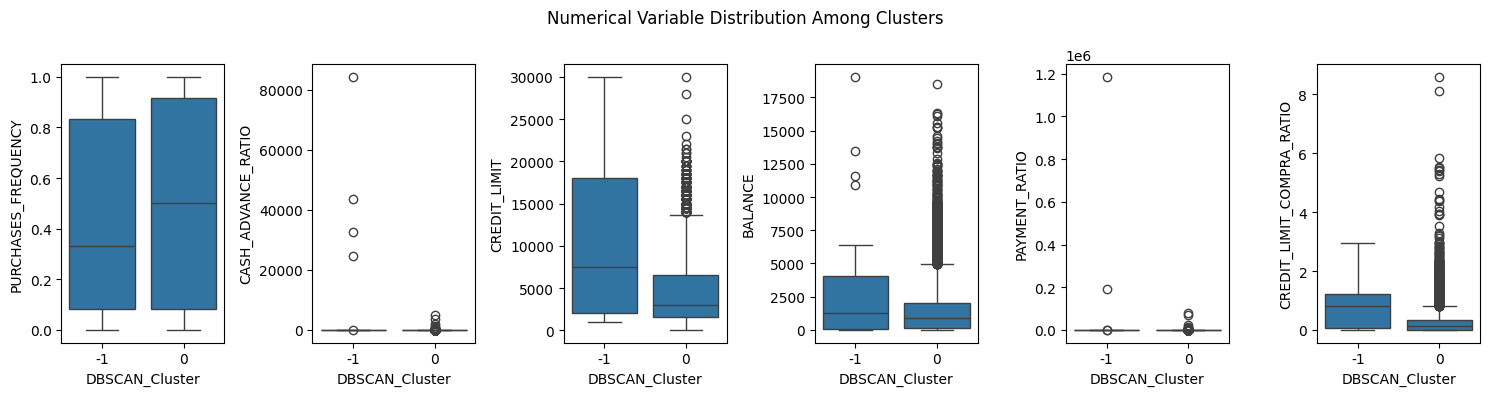

In [651]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 6, figsize=(15, 4))
cols = selected_columns
for i in range(len(cols)):
   sns.boxplot(data=data, x='DBSCAN_Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

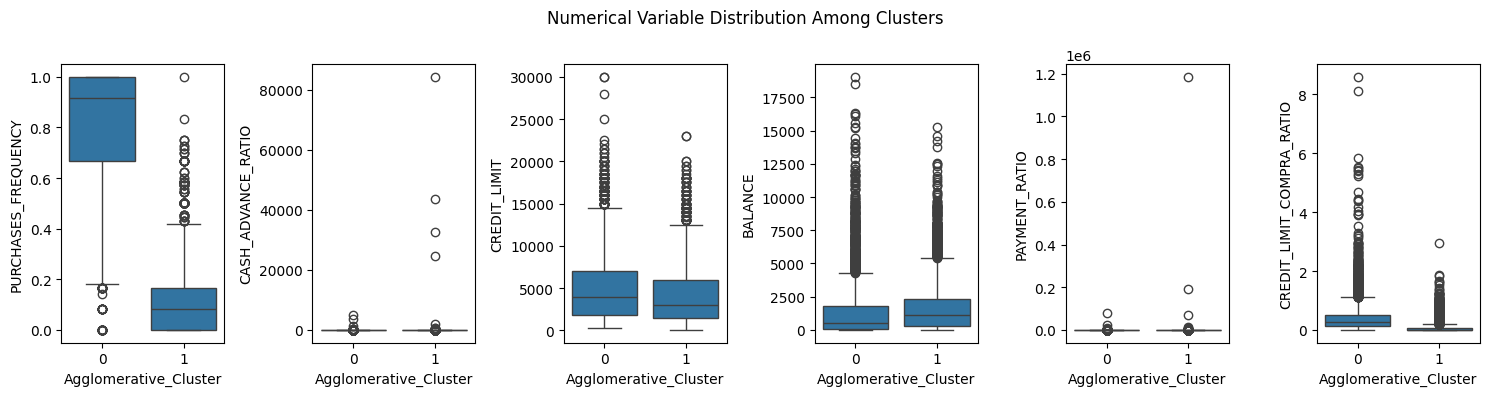

In [652]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 6, figsize=(15, 4))
cols = selected_columns
for i in range(len(cols)):
   sns.boxplot(data=data, x='Agglomerative_Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

In [655]:
optimal_k = 2
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_scaled)

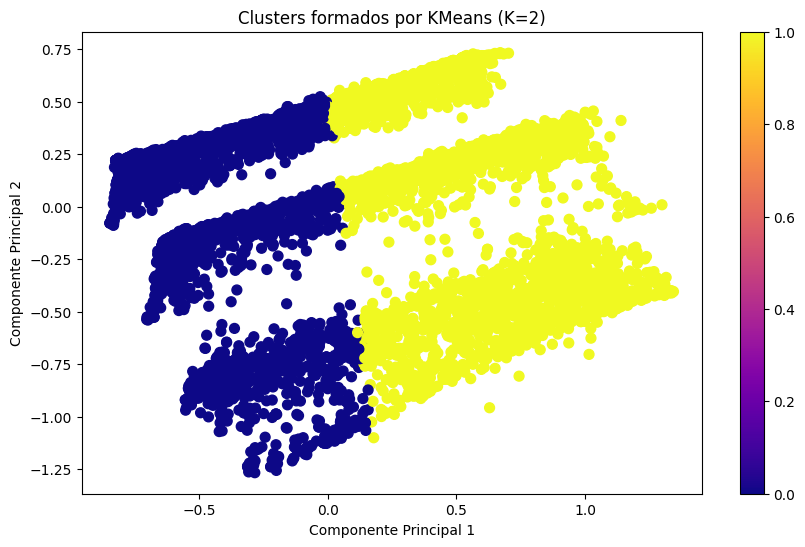

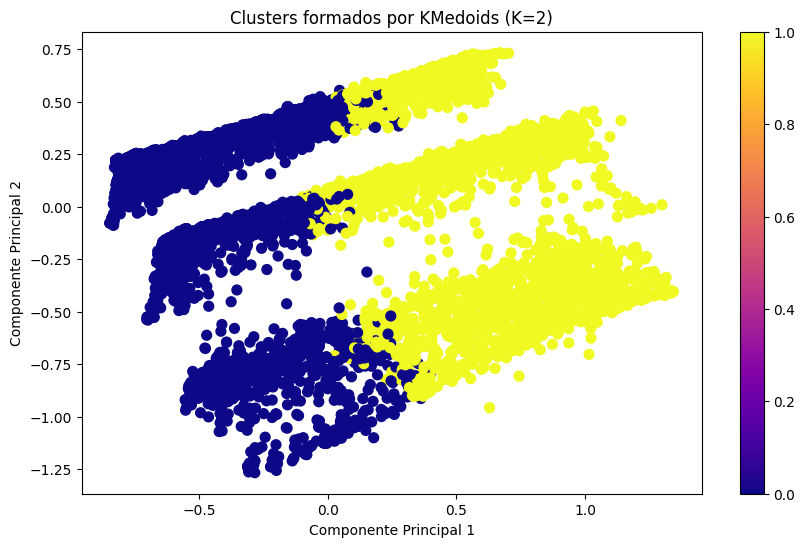

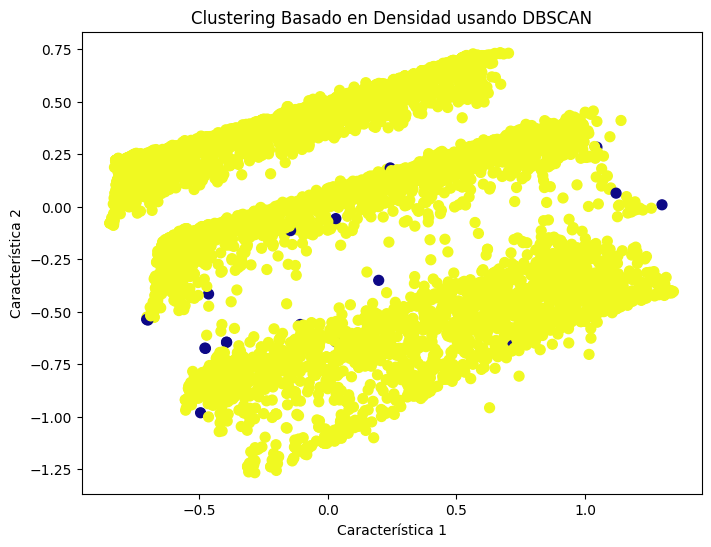

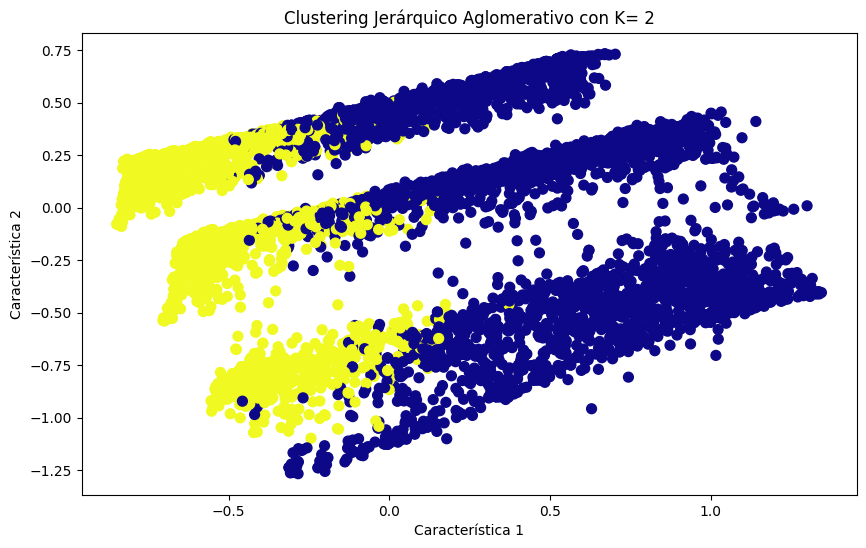

In [654]:

# Visualizar los clusters de KMeans
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='plasma', s=50)
plt.title(f'Clusters formados por KMeans (K={optimal_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

# Visualizar los clusters de KMedoids
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmedoids_labels, cmap='plasma', s=50)
plt.title(f'Clusters formados por KMedoids (K={optimal_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

#Visualizar los cluster de DBSCAN
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c= dbscan_labels, cmap='plasma', s=50)
plt.title('Clustering Basado en Densidad usando DBSCAN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

#Visualizar los cluster de Aglomerative
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=aglomerative_labels, cmap='plasma', s=50)
plt.title(f'Clustering Jerárquico Aglomerativo con K= {optimal_k}')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()



# Interpretation of clusters

In [678]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PURCHASE_ADVANCE_COMBINED,CREDIT_LIMIT_COMPRA_RATIO,PAYMENT_RATIO,CASH_ADVANCE_RATIO,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Agglomerative_Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,0.153715,11.517318,0.625495,0.262609,1.924609e+02,23.635160,0.451285,-0.002346,0.442570,0.458212
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,0.292499,1.338331,0.389347,0.436663,1.274973e+04,1094.998428,0.497649,0.048385,0.496719,0.498279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.083333,0.000000,0.000000e+00,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,12.000000,0.250000,0.011093,3.252351e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,0.000000,12.000000,0.583333,0.117228,1.360052e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,0.142857,12.000000,1.000000,0.337601,7.473916e+00,0.768896,1.000000,0.000000,1.000000,1.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,1.000000,12.000000,2.000000,8.591310,1.185884e+06,84285.671902,1.000000,0.000000,1.000000,1.000000


<Axes: xlabel='KMedoids_Cluster'>

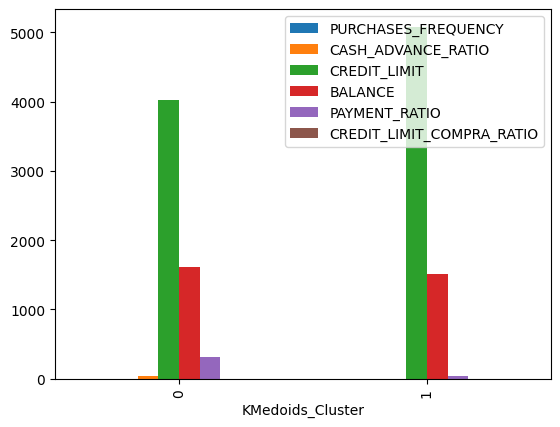

In [664]:
data.groupby('KMedoids_Cluster')[selected_columns].mean().plot.bar()


<Axes: xlabel='KMedoids_Cluster'>

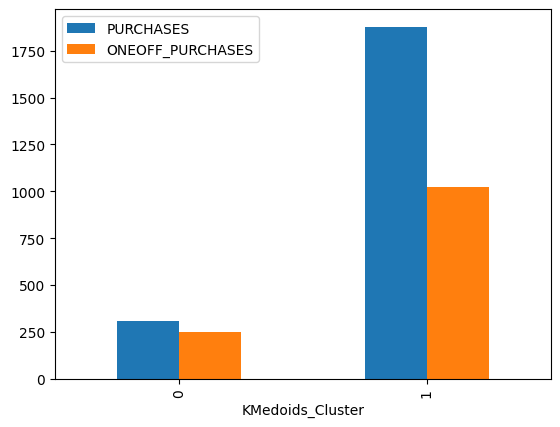

In [670]:
data.groupby('KMedoids_Cluster')[['PURCHASES','ONEOFF_PURCHASES']].mean().plot.bar()


<Axes: xlabel='KMedoids_Cluster'>

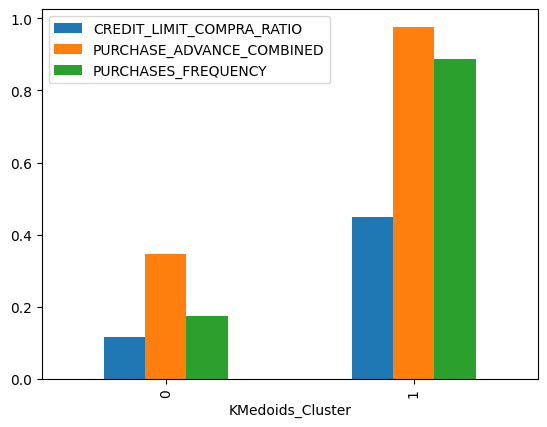

In [679]:
data.groupby('KMedoids_Cluster')[['CREDIT_LIMIT_COMPRA_RATIO','PURCHASE_ADVANCE_COMBINED','PURCHASES_FREQUENCY']].mean().plot.bar()

#Los clientes del grupo 1 tienen un nivel mayor de consumo que los del grupo 0.

<Axes: xlabel='KMedoids_Cluster'>

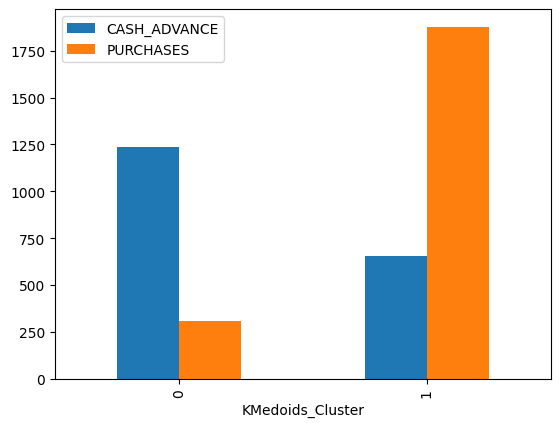

In [681]:
data.groupby('KMedoids_Cluster')[['CASH_ADVANCE','PURCHASES', ]].mean().plot.bar()


In [682]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'PURCHASE_ADVANCE_COMBINED', 'CREDIT_LIMIT_COMPRA_RATIO',
       'PAYMENT_RATIO', 'CASH_ADVANCE_RATIO', 'KMeans_Cluster',
       'DBSCAN_Cluster', 'KMedoids_Cluster', 'Agglomerative_Cluster'],
      dtype='object')

<Axes: xlabel='KMedoids_Cluster'>

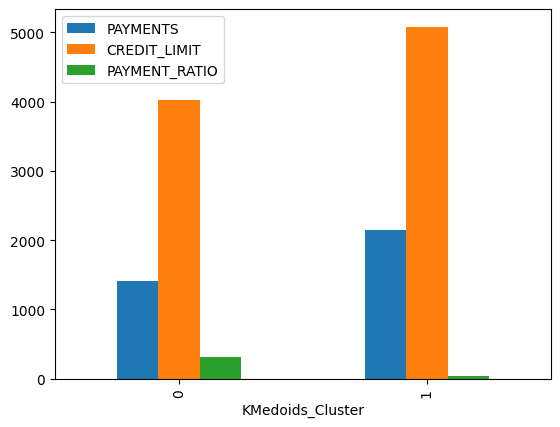

In [686]:
data.groupby('KMedoids_Cluster')[['PAYMENTS','CREDIT_LIMIT', 'PAYMENT_RATIO']].mean().plot.bar()
